Привет, меня зовут Артем. Сегодня я проверю твой проект.
<br> Дальнейшее общение будет происходить на "ты" если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий ('исправил', 'не понятно как исправить ошибку', ...)
<br> Пожалуйста, не удаляй комментарии ревьюера, так как они повышают качество повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-info">
<b>Совет: </b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>Ошибка:</b> Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

### <font color='orange'>Общее впечатление</font>
* Большое спасибо за проделанную работу. Видно, что приложено много усилий.
* Отлично, что доверительный интервал и риск убытков посчитаны верно.
* Над этим проектом нужно будет еще немного поработать. Однако, изменения не должны занять много времени.
* С радостью отвечу на твои вопросы, если они есть. Лучше всего их собрать в следующей ячейке. Жду новую версию проекта.

# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Цель проекта:**

*Построить модель для определения региона, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой Bootstrap.*


**Задачи исследования:**
1. Загрузите и подготовьте данные. Поясните порядок действийПредобработка данных
2. Обучите и проверьте модель для каждого региона
3. Подготовьтесь к расчёту прибыли
4. Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели
5. Посчитайте риски и прибыль для каждого региона


**Исходные данные:**
- Данные геологоразведки трёх регионов находятся в файлах: 
  - `id` — уникальный идентификатор скважины;
  - `f0, f1, f2` — три признака точек (неважно, что они означают, но сами признаки значимы);
  - `product` — объём запасов в скважине (тыс. баррелей).


**Условия задачи:**
- Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые).
- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

*Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.*



In [1]:
!pip install phik

In [2]:
!pip install -q scikit-learn==1.1.3

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from plotly.subplots import make_subplots
import plotly.graph_objs as pgo
import plotly.express as pex

from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression
)

from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV
)

from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    OrdinalEncoder,
    MinMaxScaler,
    RobustScaler,
    PolynomialFeatures,
    LabelEncoder

)

from sklearn.metrics import (
    roc_auc_score,
    r2_score,
    accuracy_score,
    mean_squared_error,
    f1_score, 
    
)

from sklearn.feature_selection import (SelectKBest, f_classif)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier

import phik


<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

## Загрузка и подготовка данных

### Загрузка данных

In [4]:
# отображение и вывод информации о датасете
def information(df, num):
    return display(df.head(num), df.info())

In [5]:
path_dataset_geo_data_0 = '/datasets/geo_data_0.csv'
path_loc_geo_data_0 = 'geo_data_0.csv'

path_dataset_geo_data_1 = '/datasets/geo_data_1.csv'
path_loc_geo_data_1 = 'geo_data_1.csv'

path_dataset_geo_data_2 = '/datasets/geo_data_2.csv'
path_loc_geo_data_2 = 'geo_data_2.csv'


try:
    geo_data_0 = pd.read_csv(path_dataset_geo_data_0)
    geo_data_1 = pd.read_csv(path_dataset_geo_data_1)
    geo_data_2 = pd.read_csv(path_dataset_geo_data_2)
    
except:
    geo_data_0 = pd.read_csv(path_loc_geo_data_0)
    geo_data_1 = pd.read_csv(path_loc_geo_data_1)
    geo_data_2 = pd.read_csv(path_loc_geo_data_2)
    

In [6]:
information(geo_data_0, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


None

In [7]:
information(geo_data_1, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


None

In [8]:
information(geo_data_2, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


None

**Вывод:**
- Данные загрузились корректно:
   - `geo_data_0.csv` : 100000 записей и 5 колонок
   - `geo_data_1.csv` : 100000 записей и 5 колонок
   - `geo_data_2.csv` : 100000 записей и 5 колонок

### Предобработка данных

In [9]:
def proportion_of_omissions_and_obvious_duplicates(df):
    print('Пропуски:')
    print(df.isna().sum())
    print('------------------------------------')
    print('Явные дубликаты:')
    print(df.duplicated().sum())
    print('------------------------------------')
    for column in df.columns:
        if column != 'id':
            print('Доля пропусков в ', f'столблце {column}' ,' составляет {:.1%}'
                  .format(len(df[df[column].isnull() == True]) / df.shape[0]))


In [10]:
proportion_of_omissions_and_obvious_duplicates(geo_data_0)

Пропуски:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
------------------------------------
Явные дубликаты:
0
------------------------------------
Доля пропусков в  столблце f0  составляет 0.0%
Доля пропусков в  столблце f1  составляет 0.0%
Доля пропусков в  столблце f2  составляет 0.0%
Доля пропусков в  столблце product  составляет 0.0%


In [11]:
proportion_of_omissions_and_obvious_duplicates(geo_data_1)

Пропуски:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
------------------------------------
Явные дубликаты:
0
------------------------------------
Доля пропусков в  столблце f0  составляет 0.0%
Доля пропусков в  столблце f1  составляет 0.0%
Доля пропусков в  столблце f2  составляет 0.0%
Доля пропусков в  столблце product  составляет 0.0%


In [12]:
proportion_of_omissions_and_obvious_duplicates(geo_data_2)

Пропуски:
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
------------------------------------
Явные дубликаты:
0
------------------------------------
Доля пропусков в  столблце f0  составляет 0.0%
Доля пропусков в  столблце f1  составляет 0.0%
Доля пропусков в  столблце f2  составляет 0.0%
Доля пропусков в  столблце product  составляет 0.0%


**Вывод:**

Проведена предобработка данных. Дубликатов и пропусков не обнаруженно. Данные в таблицах в удобочитаемом формате. Типы данных корректны.

### Исследовательский анализ данных

In [13]:
def creator_histogram_and_boxplot(df, column_name):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.title(f'Распределение для "{column_name}"')
    plt.xlabel(f'Значение "{column_name}"')
    plt.ylabel('Плотность распределения')
    sns.histplot(data=df, x=column_name, kde=True ,palette='BuPu', stat='density', common_norm=False)

    plt.subplot(1, 2, 2)
    plt.title(f'Диаграмма размаха "{column_name}"')
    plt.ylabel('Плотность распределения')
    sns.boxplot(y=column_name, hue=False, data=df, palette='BuPu')


In [14]:
def categories_of_characteristics(df):
    num_col = []
    cat_col = []

    for column in df.columns:
        if column != 'id':
            if df[column].dtype == 'object':
                cat_col.append(column)
            else:
                num_col.append(column)
    print('Количественные:', num_col)
    print('Категориальные:', cat_col)


In [15]:
categories_of_characteristics(geo_data_0)

Количественные: ['f0', 'f1', 'f2', 'product']
Категориальные: []


**Датасет geo_data_0.csv**

/var/folders/l_/0n86g_4530z00_008hmyldrw0000gn/T/ipykernel_42645/1973878944.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, kde=True ,palette='BuPu', stat='density', common_norm=False)


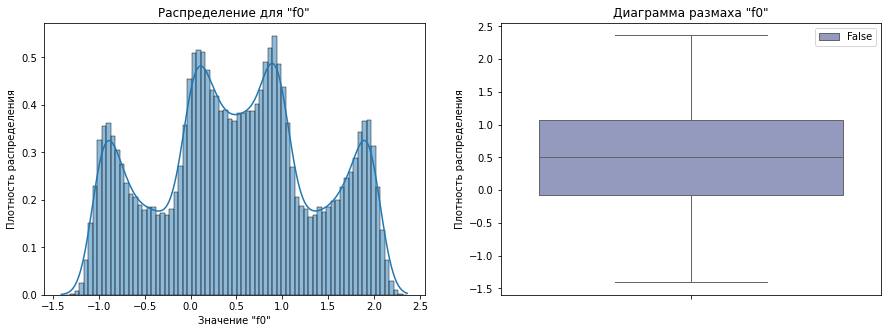

In [16]:
creator_histogram_and_boxplot(geo_data_0, 'f0')

In [17]:
geo_data_0['f0'].describe()

count    100000.000000
mean          0.500419
std           0.871832
min          -1.408605
25%          -0.072580
50%           0.502360
75%           1.073581
max           2.362331
Name: f0, dtype: float64

/var/folders/l_/0n86g_4530z00_008hmyldrw0000gn/T/ipykernel_42645/1973878944.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, kde=True ,palette='BuPu', stat='density', common_norm=False)


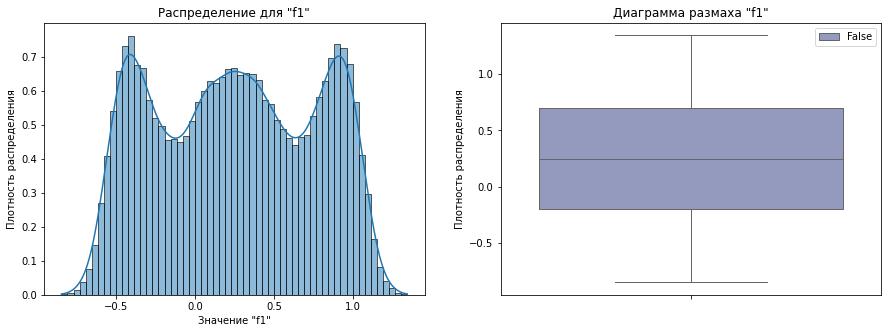

In [18]:
creator_histogram_and_boxplot(geo_data_0, 'f1')

In [19]:
geo_data_0['f1'].describe()

count    100000.000000
mean          0.250143
std           0.504433
min          -0.848218
25%          -0.200881
50%           0.250252
75%           0.700646
max           1.343769
Name: f1, dtype: float64

/var/folders/l_/0n86g_4530z00_008hmyldrw0000gn/T/ipykernel_42645/1973878944.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, kde=True ,palette='BuPu', stat='density', common_norm=False)


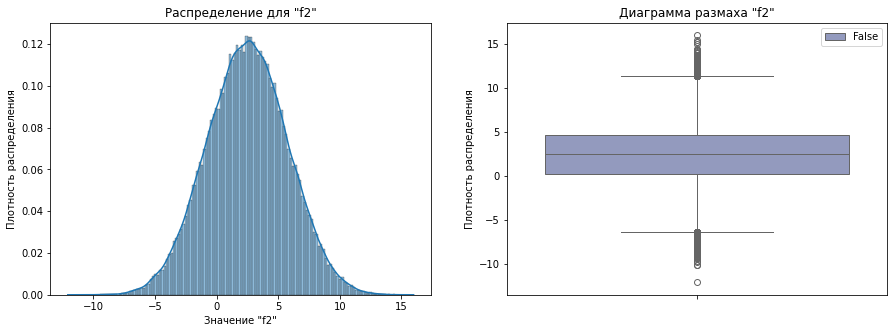

In [20]:
creator_histogram_and_boxplot(geo_data_0, 'f2')

In [21]:
geo_data_0['f2'].describe()

count    100000.000000
mean          2.502647
std           3.248248
min         -12.088328
25%           0.287748
50%           2.515969
75%           4.715088
max          16.003790
Name: f2, dtype: float64

/var/folders/l_/0n86g_4530z00_008hmyldrw0000gn/T/ipykernel_42645/1973878944.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, kde=True ,palette='BuPu', stat='density', common_norm=False)


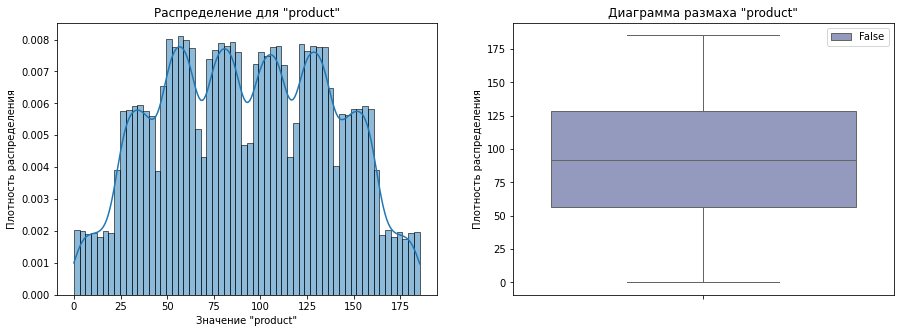

In [22]:
creator_histogram_and_boxplot(geo_data_0, 'product')

In [23]:
geo_data_0['product'].describe()

count    100000.000000
mean         92.500000
std          44.288691
min           0.000000
25%          56.497507
50%          91.849972
75%         128.564089
max         185.364347
Name: product, dtype: float64

Рассмотрим наличие линейной взаимосвязи между целевой переменной и входными признаками

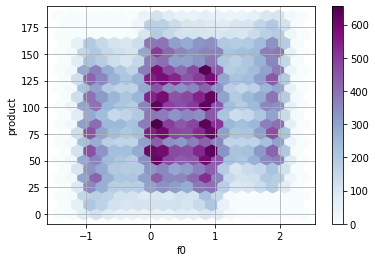

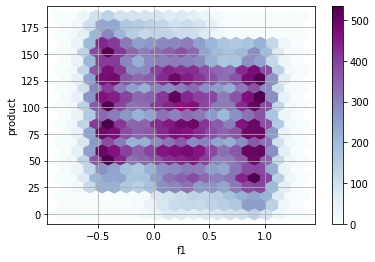

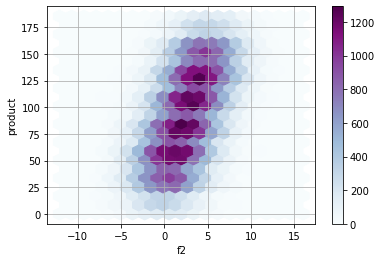

In [24]:
num_columns_0 = ['f0', 'f1', 'f2']

for column in num_columns_0:
    geo_data_0.plot(x=column, y='product', kind='hexbin', gridsize=20, sharex=False, grid=True, colormap='BuPu')

**Датасет geo_data_1.csv**

/var/folders/l_/0n86g_4530z00_008hmyldrw0000gn/T/ipykernel_42645/1973878944.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, kde=True ,palette='BuPu', stat='density', common_norm=False)


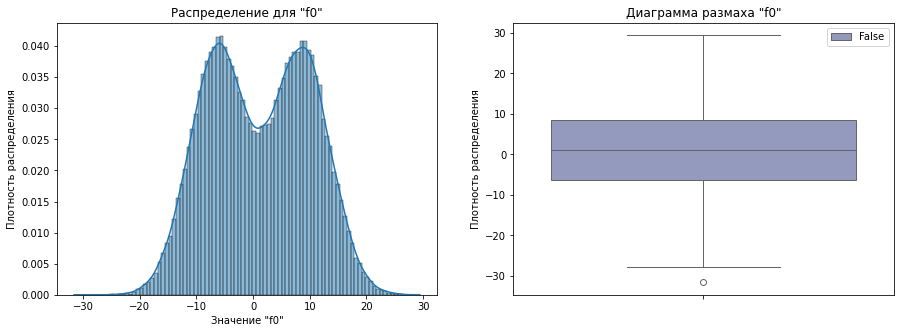

In [25]:
creator_histogram_and_boxplot(geo_data_1, 'f0')

In [26]:
geo_data_1['f0'].describe()

count    100000.000000
mean          1.141296
std           8.965932
min         -31.609576
25%          -6.298551
50%           1.153055
75%           8.621015
max          29.421755
Name: f0, dtype: float64

/var/folders/l_/0n86g_4530z00_008hmyldrw0000gn/T/ipykernel_42645/1973878944.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, kde=True ,palette='BuPu', stat='density', common_norm=False)


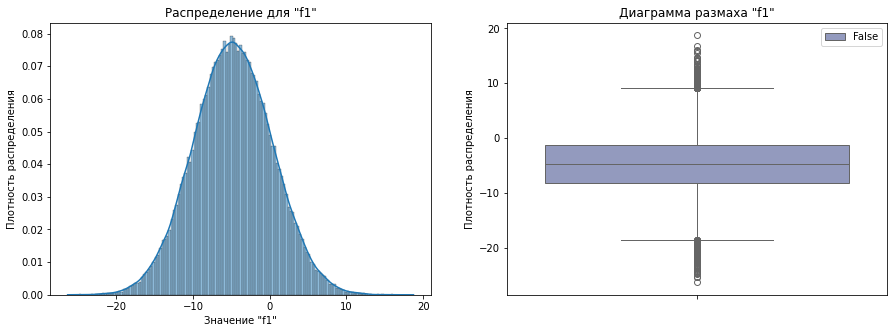

In [27]:
creator_histogram_and_boxplot(geo_data_1, 'f1')

In [28]:
geo_data_1['f1'].describe()

count    100000.000000
mean         -4.796579
std           5.119872
min         -26.358598
25%          -8.267985
50%          -4.813172
75%          -1.332816
max          18.734063
Name: f1, dtype: float64

/var/folders/l_/0n86g_4530z00_008hmyldrw0000gn/T/ipykernel_42645/1973878944.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, kde=True ,palette='BuPu', stat='density', common_norm=False)


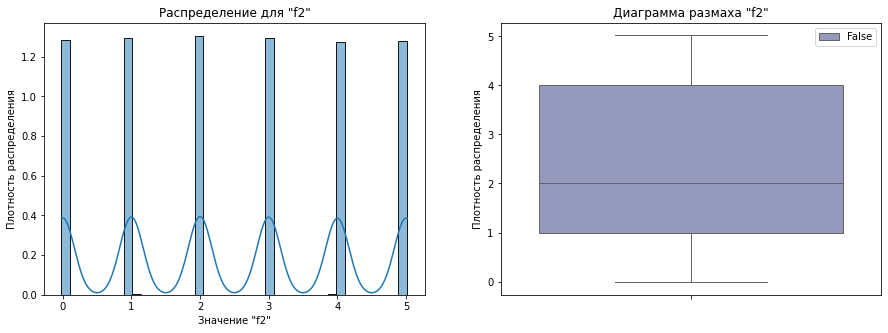

In [29]:
creator_histogram_and_boxplot(geo_data_1, 'f2')

In [30]:
geo_data_1['f2'].describe()

count    100000.000000
mean          2.494541
std           1.703572
min          -0.018144
25%           1.000021
50%           2.011479
75%           3.999904
max           5.019721
Name: f2, dtype: float64

/var/folders/l_/0n86g_4530z00_008hmyldrw0000gn/T/ipykernel_42645/1973878944.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, kde=True ,palette='BuPu', stat='density', common_norm=False)


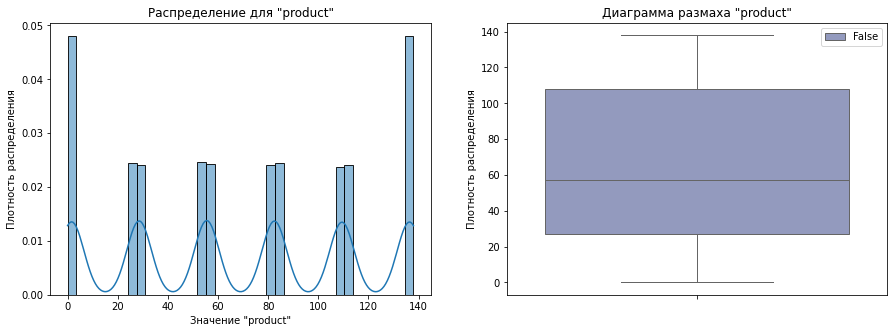

In [31]:
creator_histogram_and_boxplot(geo_data_1, 'product')

In [32]:
geo_data_1['product'].describe()

count    100000.000000
mean         68.825000
std          45.944423
min           0.000000
25%          26.953261
50%          57.085625
75%         107.813044
max         137.945408
Name: product, dtype: float64

Рассмотрим наличие линейной взаимосвязи между целевой переменной и входными признаками

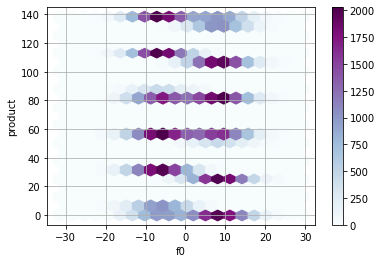

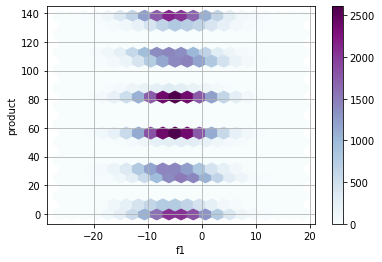

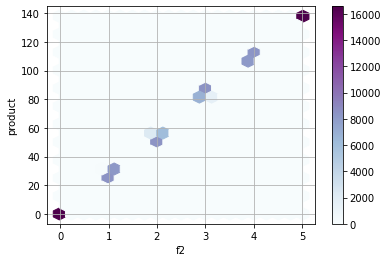

In [33]:
num_columns_1 = ['f0', 'f1', 'f2']

for column in num_columns_1:
    geo_data_1.plot(x=column, y='product', kind='hexbin', gridsize=20, sharex=False, grid=True, colormap='BuPu')

**Датасет geo_data_2.csv**

/var/folders/l_/0n86g_4530z00_008hmyldrw0000gn/T/ipykernel_42645/1973878944.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, kde=True ,palette='BuPu', stat='density', common_norm=False)


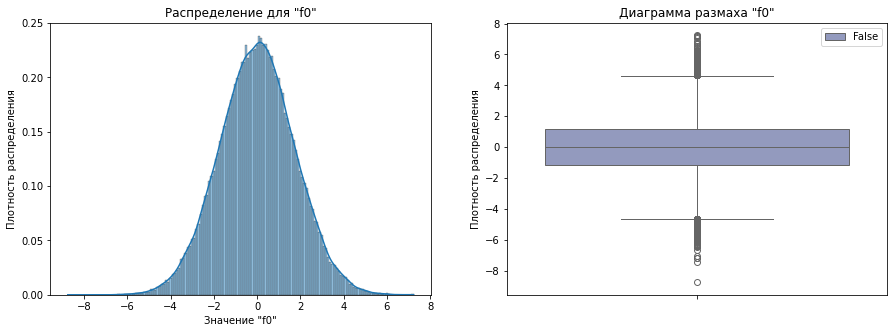

In [34]:
creator_histogram_and_boxplot(geo_data_2, 'f0')

In [35]:
geo_data_2['f0'].describe()

count    100000.000000
mean          0.002023
std           1.732045
min          -8.760004
25%          -1.162288
50%           0.009424
75%           1.158535
max           7.238262
Name: f0, dtype: float64

/var/folders/l_/0n86g_4530z00_008hmyldrw0000gn/T/ipykernel_42645/1973878944.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, kde=True ,palette='BuPu', stat='density', common_norm=False)


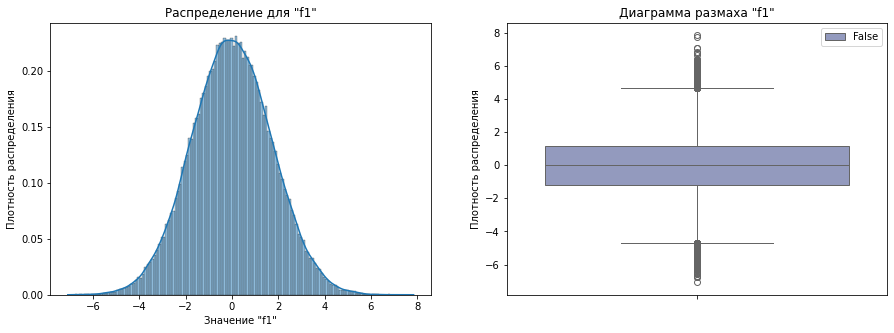

In [36]:
creator_histogram_and_boxplot(geo_data_2, 'f1')

In [37]:
geo_data_2['f1'].describe()

count    100000.000000
mean         -0.002081
std           1.730417
min          -7.084020
25%          -1.174820
50%          -0.009482
75%           1.163678
max           7.844801
Name: f1, dtype: float64

/var/folders/l_/0n86g_4530z00_008hmyldrw0000gn/T/ipykernel_42645/1973878944.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, kde=True ,palette='BuPu', stat='density', common_norm=False)


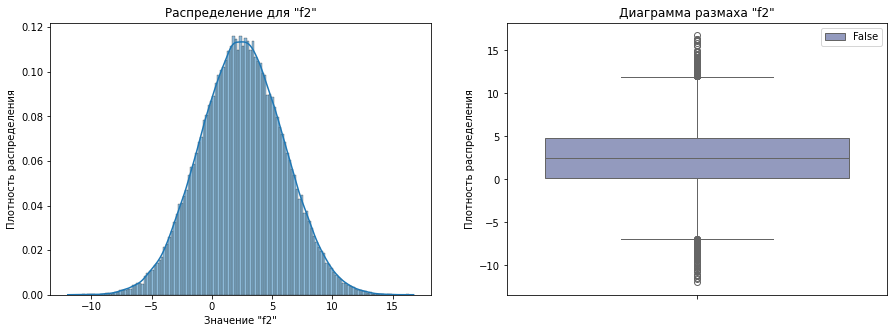

In [38]:
creator_histogram_and_boxplot(geo_data_2, 'f2')

In [39]:
geo_data_2['f2'].describe()

count    100000.000000
mean          2.495128
std           3.473445
min         -11.970335
25%           0.130359
50%           2.484236
75%           4.858794
max          16.739402
Name: f2, dtype: float64

/var/folders/l_/0n86g_4530z00_008hmyldrw0000gn/T/ipykernel_42645/1973878944.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=column_name, kde=True ,palette='BuPu', stat='density', common_norm=False)


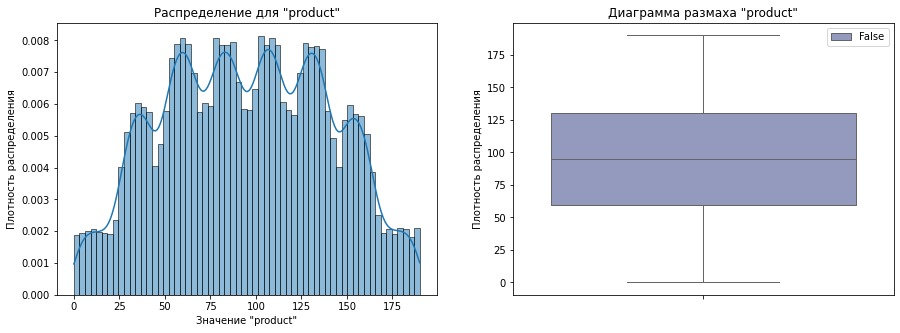

In [40]:
creator_histogram_and_boxplot(geo_data_2, 'product')

In [41]:
geo_data_2['product'].describe()

count    100000.000000
mean         95.000000
std          44.749921
min           0.000000
25%          59.450441
50%          94.925613
75%         130.595027
max         190.029838
Name: product, dtype: float64

Рассмотрим наличие линейной взаимосвязи между целевой переменной и входными признаками

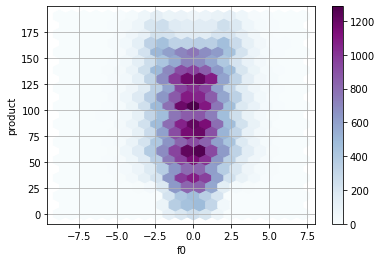

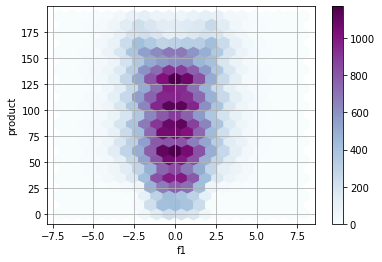

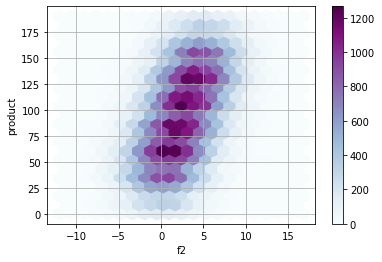

In [42]:
num_columns_2 = ['f0', 'f1', 'f2']

for column in num_columns_2:
    geo_data_2.plot(x=column, y='product', kind='hexbin', gridsize=20, sharex=False, grid=True, colormap='BuPu')

**Вывод:**

1. По датасету `geo_data_0`:
  - можно отметить симметричное распределение данных относительно медианного значения
  - признак `f2` распределен нормально
  - аномальных значений не наблюдается
  - сложно говорить о линейной взаимосвязи признаков `f0` и `f1` с целевым признаком
  - для признака `f2` видна линейная взаимосвязь с целевым признаком
  
  
2. По датасету `geo_data_1`:
  - только признак `f1` распределен нормально
  - аномальные значения не неблюдаются
  - явная линейная взаимосвязь наблюдается между целевой переменной и признаком `f2`
 
 
3. По датасету `geo_data_2`:
  - все признаки распределены нормально
  - аномальных значений не наблюдается
  - явная линейная взаимосвязь наблюдается между целевой переменной и признаком `f2`
 

### Корреляционный анализ

In [43]:
def correlation_analysis(df, names_col):
    corr_matrix_train = df.drop(['id'], axis=1).phik_matrix(interval_cols=names_col)

    plt.figure(figsize=(10, 10))
    sns.heatmap(corr_matrix_train, annot=True,  cmap='coolwarm')
    plt.title('Матрица корреляции тренировочных данных')
    plt.show()

In [44]:
num_col_corr_matrix = ['f0', 'f1', 'f2', 'product']

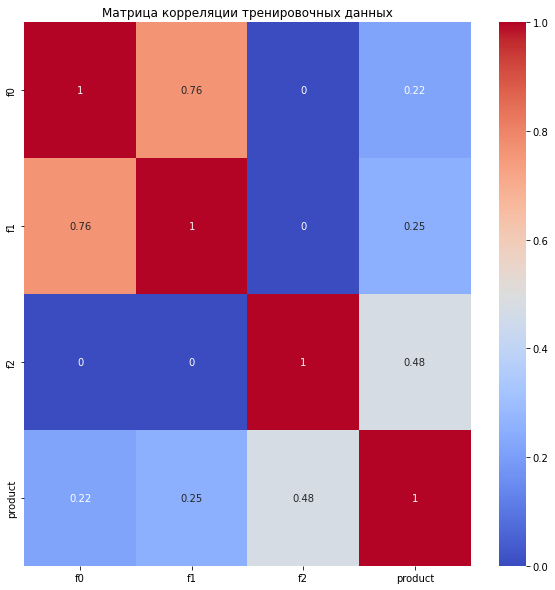

In [45]:
correlation_analysis(geo_data_0, num_col_corr_matrix)

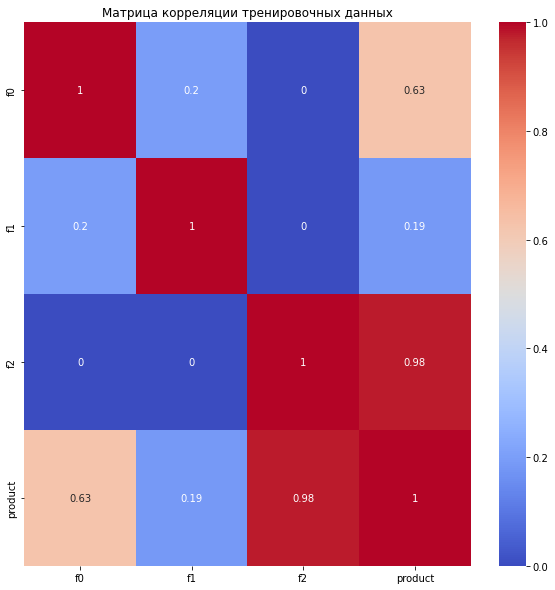

In [46]:
correlation_analysis(geo_data_1, num_col_corr_matrix)

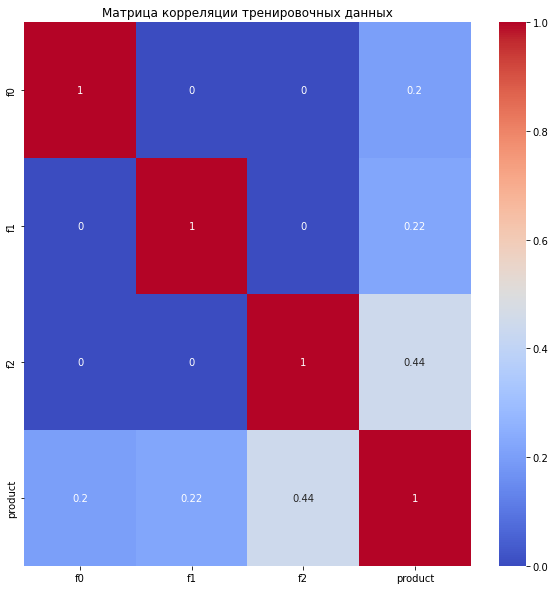

In [47]:
correlation_analysis(geo_data_2, num_col_corr_matrix)

**Вывод:**

1. Датасет `geo_data_0`:
  - имеется высокая корреляция между признаками `f1` и `f2`
  - мультиколлениарность не наблюдается


2. Датасет `geo_data_1`:
  - имеется высокая корреляция между признаками `f0` и `product`
  - имеется высокая корреляция между признаками `f2` и `product`
  - не известно, что представляют собой входные признаки, то будем считать, что высокая корреляция признака `f2` и целевой переменной не связана с (утечкой данных) и оставим этот признак для обучения 


3. Датасет `geo_data_2`:
  - входные признаки практически не коррелируются между собой
  - мультиколлениарность не наблюдается

<div class="alert alert-block alert-success">
<b>Успех:</b> Данные загружены и осмотрены корректно. Радует, что распределения и корреляции были визуализированы!
</div>

## Обучение и проверка модели

1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.
2. Обучите модель и сделайте предсказания на валидационной выборке.
3. Сохраните предсказания и правильные ответы на валидационной выборке.
4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.
5. Проанализируйте результаты.

In [48]:
new_geo_0 = geo_data_0.set_index('id')
new_geo_1 = geo_data_1.set_index('id')
new_geo_2 = geo_data_2.set_index('id')

In [49]:
TEST_SIZE = 0.25
RANDOM_STATE = 42

num_column = ['f0', 'f1', 'f2']

In [50]:
def modeling_linear(df, target):
    
    X = df.drop(target, axis=1)
    y = df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, test_size=TEST_SIZE)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model_lr = LinearRegression()
    model_lr.fit(X_train_scaled, y_train)
    
    model_predict = model_lr.predict(X_test_scaled)
    
    RMSE = mean_squared_error(y_test, model_predict, squared=False)
    R2 = r2_score(y_test, model_predict)

    model_predict_mean = model_predict.mean()
    
    return RMSE, R2, model_predict_mean, model_predict, y_test
 

In [51]:
# Выполним стандартизацию 
tmp_geo_data_0 = modeling_linear(new_geo_0, 'product')
tmp_geo_data_1 = modeling_linear(new_geo_1, 'product')
tmp_geo_data_2 = modeling_linear(new_geo_2, 'product')

rmse_geo_0, r2_geo_0, model_predict_mean_geo_0, predict_geo_0, y_test_geo_0 = \
modeling_linear(new_geo_0, 'product')

rmse_geo_1, r2_geo_1, model_predict_mean_geo_1, predict_geo_1, y_test_geo_1 = \
modeling_linear(new_geo_1, 'product')

rmse_geo_2, r2_geo_2, model_predict_mean_geo_2, predict_geo_2, y_test_geo_2 = \
modeling_linear(new_geo_2, 'product')


print(f'RMSE={round(rmse_geo_0,3)}, \
        R2={round(r2_geo_0, 3)}, \
        среднее значение предсказанного сырья = {round(model_predict_mean_geo_0, 3)} ')

print(f'RMSE={round(rmse_geo_1,3)}, \
        R2={round(r2_geo_1, 3)}, \
        среднее значение предсказанного сырья = {round(model_predict_mean_geo_1, 3)} ')

print(f'RMSE={round(rmse_geo_2,3)}, \
        R2={round(r2_geo_2, 3)}, \
        среднее значение предсказанного сырья = {round(model_predict_mean_geo_2, 3)} ')


RMSE=37.757,         R2=0.273,         среднее значение предсказанного сырья = 92.399 
RMSE=0.89,         R2=1.0,         среднее значение предсказанного сырья = 68.713 
RMSE=40.146,         R2=0.196,         среднее значение предсказанного сырья = 94.771 


Признаки не сильно отличаются изменения значений.


Показания RMSE отличаются в каждом регионе, как и среднее значение сырья.

In [52]:
tmp_geo_data_0 = (round(rmse_geo_0, 3), round(r2_geo_0, 4), round(model_predict_mean_geo_0, 3))
tmp_geo_data_1 = (round(rmse_geo_1, 3), round(r2_geo_1, 4), round(model_predict_mean_geo_1, 3))
tmp_geo_data_2 = (round(rmse_geo_2, 3), round(r2_geo_2, 4), round(model_predict_mean_geo_2, 3))

all_data_geo = (tmp_geo_data_0, tmp_geo_data_1, tmp_geo_data_2)

new_data_result = pd.DataFrame(all_data_geo, columns=['RMSE', 'R2', 'mean_value_materials'])
new_data_result['region'] = [1, 2, 3]

In [53]:
new_data_result.head()

,RMSE,R2,mean_value_materials,region
0,37.757,0.2728,92.399,1
1,0.890,0.9996,68.713,2
2,40.146,0.1963,94.771,3


**Вывод:**

- в первом регионе `RMSE` = 37.756, а  `R2` = 0.272, `mean_value_materials` = 92.398

- во втором регионе показатель метрики `RMSE` оказался самым низким (0.890), также была проведена проверка и с метрикой `R2` (0.99), который приблизился к 1. Возможно это связано с сильной кореляцией признака `f2`в данном регионе. Модель показала себя отлично в предсказании. `mean_value_materials` = 68.712

- в третьем регионе `RMSE` = 40.145, а  `R2` = 0.196, `mean_value_materials` = 94.771


<div class="alert alert-block alert-success">
<b>Успех:</b> Модели обучены корректно. Радует, что ты активно используешь функции. Это помогает избежать дублирования кода, а значит уменьшает вероятность совершить ошибку/опечатку!
</div>

## Подготовка к расчёту прибыли

1. Все ключевые значения для расчётов сохраните в отдельных переменных.
2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. 
3. Напишите выводы по этапу подготовки расчёта прибыли.

In [54]:
POINT = 500
BEST_POINT = 200
DEVELOPMENT_BUDGET = 10*10**9
PRODUCT_INCOME = 450000
PROBABILITY_OF_LOSS = 0.025

sufficient_volume = (DEVELOPMENT_BUDGET / PRODUCT_INCOME) / BEST_POINT

In [55]:
print('Достаточный объем сырья: ', round(sufficient_volume, 2), 'тыс. баррелей')

Достаточный объем сырья:  111.11 тыс. баррелей


In [56]:
print('Средний объем сырья скважины в 1-ом регионе:', round(model_predict_mean_geo_0, 2), ' тыс. баррелей')
print('Средний объем сырья скважины в 2-ом регионе:', round(model_predict_mean_geo_1, 2), ' тыс. баррелей')
print('Средний объем сырья скважины в 3-ом регионе:', round(model_predict_mean_geo_2, 2), ' тыс. баррелей')

Средний объем сырья скважины в 1-ом регионе: 92.4  тыс. баррелей
Средний объем сырья скважины в 2-ом регионе: 68.71  тыс. баррелей
Средний объем сырья скважины в 3-ом регионе: 94.77  тыс. баррелей


**Вывод:**

- объем сырья для безубыточной разработки новой скважины составляет: **111.11 тыс. баррелей**. 
- средний объем запасов скважин во всех 3-ех регионах меньше **111.11 тыс. баррелей**.
- во 2-ом регионе, модель показала себя хорошо прогнозируя запасы скважин, хотя средние запасы меньше необходимых примерно в 1.5 раза (**68.71 тыс. баррелей**)

<div class="alert alert-block alert-success">
<b>Успех:</b> Точка безубыточности найдена верно, сравнение проведено!
</div>

## Расчёт прибыли и рисков 

1. Выберите скважины с максимальными значениями предсказаний. 
2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.
3. Рассчитайте прибыль для полученного объёма сырья.

4. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.
5. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.
6. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.

In [57]:
# def profit_calculation(target, predictions):
#     predictions_sorted = pd.Series(predictions).sort_values(ascending=False)[:BEST_POINT]
#     target_sorted = target[predictions_sorted.index]
#     return round((target_sorted.sum() * PRODUCT_INCOME) - DEVELOPMENT_BUDGET, 2)

<div class="alert alert-block alert-danger">

<b>Ошибка:</b> Пожалуйста, напечатай размер объекта `target_sorted` во время бутсраппирования. Подумай, почему так произошло?
</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Исправим алгоритм работы данной функции. Чтобы объект target_sorted оставался одной размерности.</font>
</div>

In [58]:
def profit_calculation(target, predictions):
    predictions_sorted = pd.Series(predictions).sort_values(ascending=False)
    target_sorted = target[predictions_sorted.index][:BEST_POINT]
    # print('Размер объекта target_sort: ',target_sorted.shape)
    product = target_sorted.sum()
    result = round((product * PRODUCT_INCOME) - DEVELOPMENT_BUDGET, 2)
    return result

In [59]:
print('Прибыль по выбранным скважинам в 1-ом регионе:', 
      profit_calculation(y_test_geo_0, predict_geo_0), ' рублей')

print('Прибыль по выбранным скважинам в 2-ом регионе:', 
      profit_calculation(y_test_geo_1, predict_geo_1), ' рублей')

print('Прибыль по выбранным скважинам в 3-ем регионе:', 
      profit_calculation(y_test_geo_2, predict_geo_2), ' рублей')


Прибыль по выбранным скважинам в 1-ом регионе: 3359141114.46  рублей
Прибыль по выбранным скважинам в 2-ом регионе: 2415086696.68  рублей
Прибыль по выбранным скважинам в 3-ем регионе: 2598571759.37  рублей


In [60]:
def bootstrap(target, predictions):
    RANDOM_STATE_NEW = np.random.RandomState(12345)
    
    profit_lst = []
    
    predictions = pd.Series(predictions)
    predictions.index = target.index
    
    for i in range(1000):
        tmp_target = target.sample(replace=True, random_state=RANDOM_STATE_NEW, n=POINT)
        tmp_predictions = predictions[tmp_target.index]
        
        profit_lst.append(profit_calculation(tmp_target, tmp_predictions))
        
    profit_lst = pd.Series(profit_lst)
    lower = profit_lst.quantile(0.025)
    upper = profit_lst.quantile(0.975)
    mean_profit_lst = profit_lst.mean()
    
    plt.figure(figsize=(5,5))
    plt.title('Гистограмма распределения прибыли')
    plt.hist(x=profit_lst, color='MediumPurple')
    plt.xlabel('Прибыль, рублей')
    plt.ylabel('Частота')
    plt.axvline(x=mean_profit_lst, color='r', label='Средняя прибыль')
    plt.axvline(x=lower, color='b')
    plt.axvline(x=upper, color='b')
    plt.legend(loc=0)
    plt.show()

    return profit_lst


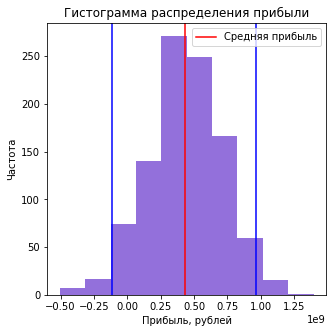

Регион 1:
Средняя выручка:  435933772.14  рублей
95%-й доверительный интервал: от -116231612.78  до  966504180.71 рублей
Риск убытков: 6.1 %


In [64]:
result_geo_0 = bootstrap(y_test_geo_0, predict_geo_0)

print('Регион 1:')
print('Средняя выручка: ', round(result_geo_0.mean(), 2), ' рублей')
print('95%-й доверительный интервал: от',round(result_geo_0.quantile(0.025), 2),' до ',  
      round(result_geo_0.quantile(0.975), 2), 'рублей')
# print('Риск убытков:', round(result_geo_0.apply(lambda x: x < 0).sum() / len(result_geo_0)*100, 3), '%')
print('Риск убытков:', round((result_geo_0 < 0).mean() * 100, 3), '%')



<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что для подсчета доверительного интервала использовался именно метод квантилей!
</div>


<div class="alert alert-block alert-info">

<b>Совет: </b> Риск можно было найти чуть проще: `(values < 0).mean()`, если объект типа pandas Series или numpy array.
</div>

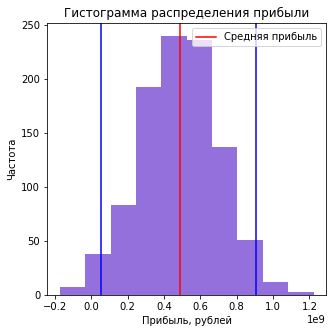

Регион 2:
Средняя выручка:  489661254.41  рублей
95%-й доверительный интервал: от 55116177.28  до  905762650.42 рублей
Риск убытков: 1.1 %


In [65]:
result_geo_1 = bootstrap(y_test_geo_1, predict_geo_1)

print('Регион 2:')
print('Средняя выручка: ', round(result_geo_1.mean(), 2), ' рублей')
print('95%-й доверительный интервал: от',round(result_geo_1.quantile(0.025), 2),' до ',  
      round(result_geo_1.quantile(0.975), 2), 'рублей')
# print('Риск убытков:', round(result_geo_1.apply(lambda x: x < 0).sum() / len(result_geo_1)*100, 3), '%')
print('Риск убытков:', round((result_geo_1 < 0).mean() * 100, 3), '%')


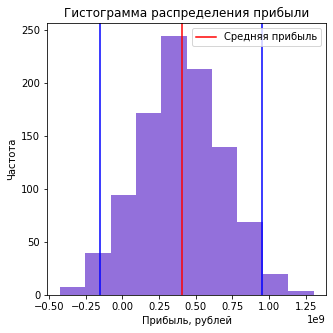

Регион 3:
Средняя выручка:  403687927.86  рублей
95%-й доверительный интервал: от -153116984.77  до  952887416.71 рублей
Риск убытков: 7.1 %


In [66]:
result_geo_2 = bootstrap(y_test_geo_2, predict_geo_2)

print('Регион 3:')
print('Средняя выручка: ', round(result_geo_2.mean(), 2), ' рублей')
print('95%-й доверительный интервал: от',round(result_geo_2.quantile(0.025), 2),' до ',  
      round(result_geo_2.quantile(0.975), 2), 'рублей')
# print('Риск убытков:', round(result_geo_2.apply(lambda x: x < 0).sum() / len(result_geo_2)*100, 3), '%')
print('Риск убытков:', round((result_geo_2 < 0).mean() * 100, 3), '%')


**Вывод:**

- самая большая прибыль в первом регионе, которая составляет 3359141114.46  рублей
- во втором регионе прибыль составила 2415086696.68  рублей
- в третьем регионе прибыль равна 2598571759.37  рублей

*Регион 1:*
- Средняя выручка:  435933772.14  рублей
- 95%-й доверительный интервал: от -116231612.78  до  966504180.71 рублей
- Риск убытков: 6.1 %

*Регион 2:*
- Средняя выручка:  489661254.41  рублей
- 95%-й доверительный интервал: от 55116177.28  до  905762650.42 рублей
- Риск убытков: 1.1 %

*Регион 3:*
- Средняя выручка:  403687927.86  рублей
- 95%-й доверительный интервал: от -153116984.77  до  952887416.71 рублей
- Риск убытков: 7.1 %


- Самым менее рискованным для бурения оказался второй регион, процентным содержанием отрицательной прибыли в точках 1.1%, поэтому можно рекомендовать бурить именно этот регион.

- Самая большая прибыль в первом регионе, а процент отрицательно прибыли в точках составляет 6.1%, на месте бизнеса можно рассмотреть этот регион тоже. Возможно стоит изучить первый регион более подробно и разработать модель для предсказаний более подходящюю для этого региона.  

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован

##  Общий вывод

1. Данные загрузились корректно


2. Проведена предобработка данных. Дубликатов и пропусков не обнаруженно. Данные в таблицах в удобочитаемом формате. Типы данных корректны.


3. Проведен иследовательский анализ:
- По датасету `geo_data_0`:
  - можно отметить симметричное распределение данных относительно медианного значения
  - признак `f2` распределен нормально
  - аномальных значений не наблюдается
  - сложно говорить о линейной взаимосвязи признаков `f0` и `f1` с целевым признаком
  - для признака `f2` видна линейная взаимосвязь с целевым признаком
  
  
- По датасету `geo_data_1`:
  - только признак `f1` распределен нормально
  - аномальные значения не неблюдаются
  - явная линейная взаимосвязь наблюдается между целевой переменной и признаком `f2`
 
 
- По датасету `geo_data_2`:
  - все признаки распределены нормально
  - аномальных значений не наблюдается
  - явная линейная взаимосвязь наблюдается между целевой переменной и признаком `f2`
 
 
 
4. Проведен корреляционный анализ:

- Датасет `geo_data_0`:
  - имеется высокая корреляция между признаками `f1` и `f2`
  - мультиколлениарность не наблюдается


- Датасет `geo_data_1`:
  - имеется высокая корреляция между признаками `f0` и `product`
  - имеется высокая корреляция между признаками `f2` и `product`
  - не известно, что представляют собой входные признаки, то будем считать, что высокая корреляция признака `f2` и целевой переменной не связана с (утечкой данных) и оставим этот признак для обучения 


- Датасет `geo_data_2`:
  - входные признаки практически не коррелируются между собой
  - мультиколлениарность не наблюдается
  
  
5. Вывод по обучению модели:
- в первом регионе `RMSE` = 37.756, а  `R2` = 0.272, `mean_value_materials` = 92.398

- во втором регионе показатель метрики `RMSE` оказался самым низким (0.890), также была проведена проверка и с метрикой `R2` (0.99), который приблизился к 1. Возможно это связано с сильной кореляцией признака `f2`в данном регионе. Модель показала себя отлично в предсказании. `mean_value_materials` = 68.712

- в третьем регионе `RMSE` = 40.145, а  `R2` = 0.196, `mean_value_materials` = 94.771


6. Проведена подготовка к расчету прибыли:
- объем сырья для безубыточной разработки новой скважины составляет: **111.11 тыс. баррелей**. 
- средний объем запасов скважин во всех 3-ех регионах меньше **111.11 тыс. баррелей**.
- во 2-ом регионе, модель показала себя хорошо прогнозируя запасы скважин, хотя средние запасы меньше необходимых примерно в 1.5 раза (**68.71 тыс. баррелей**)

7. Произведен расчет прибыли и рисков:
- самая большая прибыль в первом регионе, которая составляет 3359141114.46  рублей
- во втором регионе прибыль составила 2415086696.68  рублей
- в третьем регионе прибыль равна 2598571759.37  рублей

*Регион 1:*
- Средняя выручка:  435933772.14  рублей
- 95%-й доверительный интервал: от -116231612.78  до  966504180.71 рублей
- Риск убытков: 6.1 %

*Регион 2:*
- Средняя выручка:  489661254.41  рублей
- 95%-й доверительный интервал: от 55116177.28  до  905762650.42 рублей
- Риск убытков: 1.1 %

*Регион 3:*
- Средняя выручка:  403687927.86  рублей
- 95%-й доверительный интервал: от -153116984.77  до  952887416.71 рублей
- Риск убытков: 7.1 %



**Итог:**


*По результатам проведенного анализа самым менее рискованным для бурения оказался 2-ой регион, процентным содержанием отрицательной прибыли в точках 1.1%, поэтому можно рекомендовать бурить именно этот регион. Самая большая прибыль в первом регионе, а процент отрицательной прибыли в точках составляет 6.1%, можно рассмотреть этот регион тоже. Возможно стоит изучить первый регион подробней и разработать модели для предсказаний более подходящюю для этого региона.*
